/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


			*** OpenMP on Bluegene ***
nCores \ size		315		945		1575		1890		2835
1		1.5477265000	5.7054500000	7.6657000000	13.0495000000	0.0000000000	
2		0.1864245000	4.9006035000	4.9006935000	4.9006380000	4.9003840000	
4		0.0661805000	1.7680945000	1.7683905000	1.7681475000	1.7682770000	
7		0.0371350000	0.8539615000	0.9228825000	0.9305030000	0.9227980000	
11		0.0830610000	0.5815845000	0.5817080000	0.5816240000	0.5805730000	


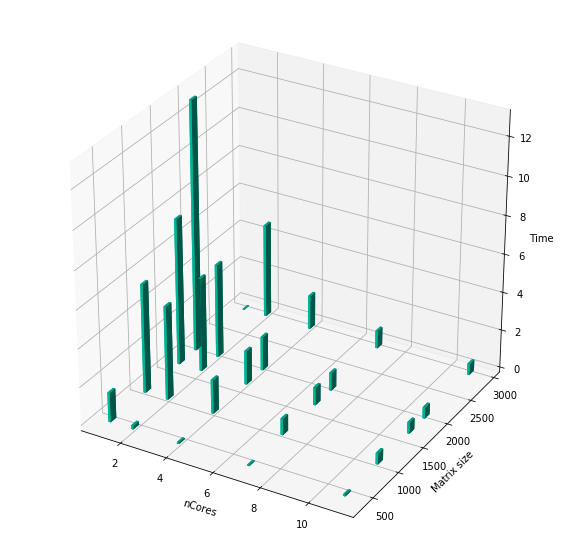

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os

def do(title, xlabel, nCoresList, sizesList):
    fig = plt.figure(figsize=(10,10))
    plt.title(title)
    ax = fig.add_subplot(111, projection='3d')
    xPos = []
    ax.set_ylabel('Matrix size')

    yPos = []
    ax.set_xlabel(xlabel)
    zPos = []
    ax.set_zlabel('Time')
    dz = []
    sheet = []

    tab = "\t"

    a = np.array ([
        [1.547726,	5.7054,	7.6415,	12.993,	0],
        [0.186437,	4.900538,	4.900699,	4.900601,	4.900441],
        [0.066168,	1.768099,	1.768471,	1.767951,	1.768315],
        [0.037131,	0.78498,	0.923047,	0.931989,	0.922959],
        [0.078872,	0.578145,	0.578157,	0.578260,	0.578193]
    ])

    b = np.array([
        [1.547727,	5.7055,	7.6899,	13.106,	0],
        [0.186412,	4.900669,	4.900688,	4.900675,	4.900327],
        [0.066193,	1.768090,	1.768310,	1.768344,	1.768239],
        [0.037139,	0.922943,	0.922718,	0.929017,	0.922637],
        [0.08725,	0.585024,	0.585259,	0.584988,	0.582953]
    ])

    mid = (a + b) / 2
    
    i1 = 0
    j1 = 0
    for (i1, nCores) in enumerate(nCoresList):
      for (j1, sz) in enumerate(sizesList):
        xPos.append(sz)
        yPos.append(nCores)
        zPos.append(0)
        time = mid[i1][j1]
        dz.append(time)
        sheet.append(time)

    dx = [0.1 for i in dz]
    dy = [100 for i in dz]

    print("\t\t\t***", title, "***")
    print(xlabel + " \ size", *sizesList, sep="\t" + tab)

    it = iter(sheet)
    for i in nCoresList:
        print(i, end="\t" + tab)
        for j in sizesList:
            f = next(it)
            try:
                f = float(f)
                print("%.10f" % f, end=tab)
            except:
                print(f, end="            " + tab)
        print()
    ax.bar3d(yPos, xPos, zPos, dx, dy, dz, color='#00ceaa')
    plt.show()


nCoresList = [1, 2, 4, 7, 11]
sizesList = [315, 945, 1575, 1890, 2835]

# nCpusList = [1, 2, 4, 8, 16, 32, 64, 128, 256]
do("OpenMP on Bluegene", "nCores", nCoresList, sizesList)